In [ ]:
#<start>only for colab users

In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.4 MB/s 


In [2]:
!mkdir images

In [3]:
!wget https://github.com/sajjadranjbar73/deep-face-recognition/raw/master/images/m.jpg -P images

--2022-09-07 17:40:11--  https://github.com/sajjadranjbar73/deep-face-recognition/raw/master/images/m.jpg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sajjadranjbar73/deep-face-recognition/master/images/m.jpg [following]
--2022-09-07 17:40:11--  https://raw.githubusercontent.com/sajjadranjbar73/deep-face-recognition/master/images/m.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34197 (33K) [image/jpeg]
Saving to: ‘images/m.jpg’

m.jpg               100%[===================>]  33.40K  --.-KB/s    in 0.004s  

2022-09-07 17:40:12 (8.28 MB/s) - ‘images/m.jpg’ saved [34197/34197]



In [ ]:
#<end>only for colab users

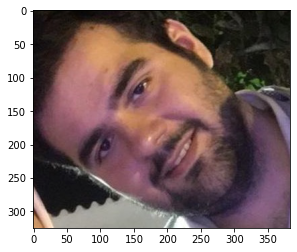

In [4]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
img = plt.imread("./images/m.jpg")
plt.imshow(img)
plt.show()

In [5]:
face_detector = MTCNN()

In [6]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

In [7]:
results = face_detector.detect_faces(img)

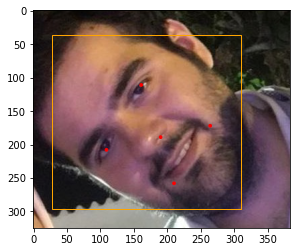

In [8]:
draw_facebox_and_keypoints('./images/m.jpg', results)

## mrthod 2

In [9]:
src = np.array([
       [  54.70657349,   73.85186005],
       [ 105.04542542,   73.57342529],
       [  80.03600311,  102.48085785],
       [  59.35614395,  131.95071411],
       [ 101.04272461,  131.72013855]], dtype=np.float32)

landmark = np.array([results[0]['keypoints']['left_eye'],\
            results[0]['keypoints']['right_eye'],\
            results[0]['keypoints']['nose'],\
            results[0]['keypoints']['mouth_left'],\
            results[0]['keypoints']['mouth_right']])

In [10]:
from skimage import transform as trans

dst = landmark.astype(np.float32)
tform = trans.SimilarityTransform()
tform.estimate(dst, src)
M = tform.params[0:2,:]
M

array([[  0.23131091,  -0.40992751, 113.73089443],
       [  0.40992751,   0.23131091, -17.25298032]])

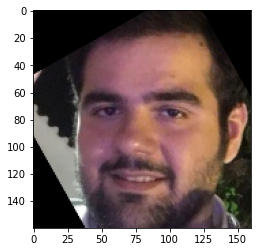

In [11]:
import cv2
wrapped = cv2.warpAffine(img,M,(160,160), borderValue = 0.0)
plt.imshow(wrapped)
plt.show()